# 朴素贝叶斯 -- 打雷了，收衣服了

朴素贝叶斯（Naive Bayes）算法是一种基于贝叶斯理论的有监督学习算法。

之所以说“朴素”， 是因为这个算法是基于样本特征之间互相独立的“朴素”假设。

正因为如此，由于不用考虑样本特征之间的关系，

朴素贝叶斯分类器的效率是非常高的。

## 朴素贝叶斯基本概念

### 贝叶斯定理

那是一个 7 月的傍晚，临近下班，小 C 收拾东西准备去接女朋友。

问题来了，小 C 要不要带伞呢？

已知：

天气预报说今日降水概率为 50% -- P（A）

晚高峰堵车的概率是 80% -- P（B）

如果下雨， 晚高峰堵车的概率是 95% -- P（B｜A）、

小 C 向窗外望去， 看到堵车了，则根据贝叶斯定理：

P（A｜B） = P（B｜A）* P（A）/ P（B）

求得下雨的概率为 0.5 * 0.95 / 0.8 = 0.59375.

### 朴素贝叶斯的简单应用

过去的 7 天当中，有 3 天下雨， 4 天没有下雨。

用 0 代表没有下雨，而 1 代表下雨。

我们用一个数组来表示：

y = [0, 1, 1, 0, 1, 0, 0]

而在这 7 天当中，还有另外一些信息，包括刮北风、闷热、多云，

In [1]:
# 导入 numpy
import numpy as np

# 将 X，y 赋值为 np 数组
X = np.array(
    [
        [0, 1, 0, 1],
        [1, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 1, 0, 1],
        [1, 0, 0, 1],
    ]
)

y = np.array([0, 1, 1, 0, 1, 0, 0])

# 将不同分类计算每个特征为 1 的数量
counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)

print("feature counts:\n{}".format(counts))

feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


【结果分析】下面我们来解释一下这个结果的意思，

当 y = 0 时， 也就在没有下雨的 4 天当中，有 1 天刮了北风，

有 2 天比较闷热，而没有出现多云的情况，但这 4 天天气预报全部播报有雨。

同时， 在 y = 1 时， 也就是在下雨的 3 天当中， 有一天刮了北风，

3 天全都是比较闷热吗，且 3 天全部出现了多云的现象，

有意思的是，这 3 天天气都没有播报有雨。

那么对于朴素贝叶斯来说， 它会根据上述的计算来推理。

它会认为，如果有一天天气预报没有播报下雨，

但是出现了多云的情况，它会倾向于把这一天放到“下雨”这一个分类中。

我们来验证一下

In [2]:
# 导入贝努利贝叶斯
from sklearn.naive_bayes import BernoulliNB

# 使用贝努利贝叶斯拟合数据
clf = BernoulliNB()

clf.fit(X, y)

# 要进行预测的这一天，没有刮北风，也不闷热
# 但是多云，天气预报没有说有雨

Next_Day = [[0, 0, 1, 0]]
pre = clf.predict(Next_Day)
if pre == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")


要下雨啦，快收衣服啊！


【结果分析】可以看出，朴素贝叶斯分类器把这一天放到了会下雨的分类当中。

那么如果有另外，刮了北风，而且狠闷热，但云量不多，同时天气预报会有雨，会怎样呢？

In [3]:
# 假设另外一天的数据如下
Another_day = [[1, 1, 0, 1]]

# 使用训练好的模型进行预测
pre2 = clf.predict(Another_day)

if pre2 == [1]:
    print("要下雨啦，快收衣服啊！")
else:
    print("放心，又是一个艳阳天")

放心，又是一个艳阳天


【结果分析】可以看到，这次分类器把这一天归为不会下雨的分类中。

现在大家可能很想知道朴素贝叶斯给出的预测准确率怎么样，

我们可以用 predict_proba 方法来测试一下

In [4]:
print(clf.predict_proba(Next_Day))

[[0.13848881 0.86151119]]


【结果分析】这个意思是说，我们所预测的第一天，

不下雨的概率大约是13.8%，

而下雨的概率是 86%，

看起来还是很不错的。

再看下第二天的预测情况。

In [5]:
print(clf.predict_proba(Another_day))

[[0.92340878 0.07659122]]


【结果分析】也就是说第二天不下雨的概率 92.3%，

下雨的概率 7.7%，

## 朴素贝叶斯算法的不同方法

### 贝努利朴素贝叶斯

贝努利分布也被称为“二项分布”或者“0-1”分布。

In [6]:
# 导入数据集生成工具
from sklearn.datasets import make_blobs
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split

# 生成样本数量为 500， 分类数为 5 的数据集
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
# 将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

# 使用贝努利贝叶斯拟合数据
nb = BernoulliNB()
nb.fit(X_train, y_train)

print('模型得分：{:.3f}'.format(nb.score(X_test, y_test)))

模型得分：0.544


【结果分析】可以看到，在我们手工生成相对复杂的数据集中，贝努利朴素贝叶斯的得分相当糟糕，

只有大约一半的数据的得分相当糟糕，只有大约一半的数据被放进了正确的分类，

这是为什么呢？

下面我们通过图像来了解一下贝努利朴素贝叶斯的工作过程

<ipython-input-7-84eb09919100>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)


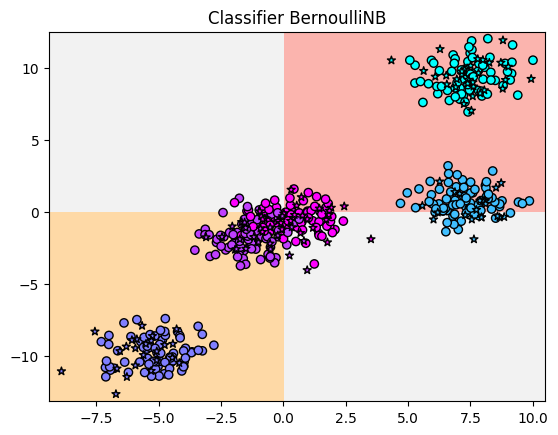

In [7]:
# 导入画图工具
import matplotlib.pyplot as plt

# 限定横轴和纵轴的最大值
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

# 将不同的背景色表示不同的分类
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02)
)

z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)

# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolor='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier BernoulliNB')

plt.show()

【结果分析】在图5-7中，我们可以看到贝努利朴素贝叶斯的模型十分简单，

它分别在横轴等于 0 和纵轴等于 0 的位置画了两条直线，

再用这两条直线形成的 4 个象限对数据进行分类。

这是因为我们使用了贝努利朴素贝叶斯的默认参数 binarize = 0.0，

所以模型对于数据的判断是，如果特征 1 大于或等于 0，

且特征 2 大于或等于 0， 则将数据归为一类；

如果特征 1 小于 0， 且特征 2 也小于 0， 则归为另一类而其余的数据全部归为第三类，

难怪模型的得分这么差了。

所以在这种情况下，我们就不能再使用贝努利朴素贝叶斯，

而要用其他的方法，例如下面要讲到的高斯朴素贝叶斯方法。

### 高斯朴素贝叶斯

样本特征符合高斯分布，或者说符合正态分布时所用的算法。

In [8]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

print('模型得分：{:.3f}'.format(gnb.score(X_test, y_test)))

模型得分：0.968


【结果分析】看起来，使用高斯朴素贝叶斯方法建立的模型得分要好了很多，

准确率达到了 96.8%，这说明我们生成的手工数据集的特征基本上符合正态分布的情况。

我们再次用图像来进行演示，

以便了解高斯朴素贝叶斯的工作工程

<ipython-input-9-6f5b8a8f34e4>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)


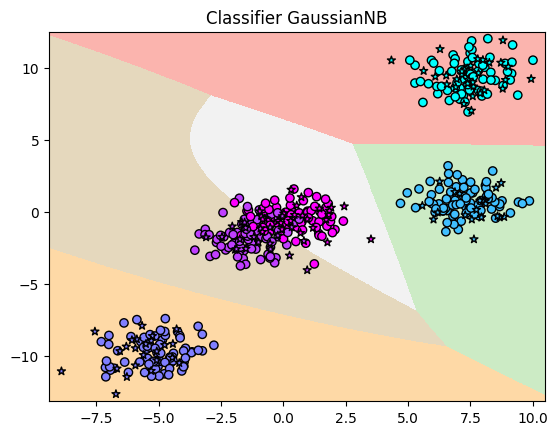

In [9]:
z = gnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)

# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolor='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier GaussianNB')

plt.show()

【结果分析】从图 5-9 中我们可以看到，

高斯朴素贝叶斯的分类边界比贝努利朴素贝叶斯的分类边界要复杂得多，

也基本把数据点都放进了正确的分类当中了。

事实上，高斯朴素贝叶斯也确实是能够胜任大部分的分类任务，这是因为在自然科学和社会科学领域，

有大量的现象都是呈现出正态分布的状态。

接下来，我们要介绍第三种方法 -- 多项式朴素贝叶斯。

### 多项式朴素贝叶斯

主要用于拟合多项式分布的数据集。

我们知道硬币只有两个面，正面和反面，

而骰子有 6 个面，因此每掷一次骰子，结果都可能是从 1-6 这 6 个数字，

如果我们掷n次骰子，而每个面朝上的次数的分布情况，就是一个多项式分布。

现在我们继续使用生成的手工数据集来对多项式朴素贝叶斯进行实验，

In [10]:
# 导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 用多项式朴素贝叶斯拟合数据

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb.score(X_test, y_test)

# 运行代码，程序会报错

ValueError: Negative values in data passed to MultinomialNB (input X)

【结果分析】提示信息告诉我们，输入的 X 值必须是非负的，

这样的话， 我们需要对数据进行一下预处理才行。

In [11]:
# 导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 导入数据预处理工具 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用多项式朴素贝叶斯拟合预处理之后的数据
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)

print('模型得分：{:.3f}'.format(mnb.score(X_test_scaled, y_test)))

模型得分：0.320


【结果分析】从结果中可以看出，虽然经过了预处理将所有特征集转化为非负的

但是多项式朴素贝叶斯还是不能获得较高的分数， 

32% 的准确率甚至比贝努利朴素贝叶斯的得分还要糟糕一点。

如果我们用图形表示的话，也就是可以直观地看出多项式朴素贝叶斯并不适合用来拟合这个数据集。

<ipython-input-13-89aeefadf2da>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)


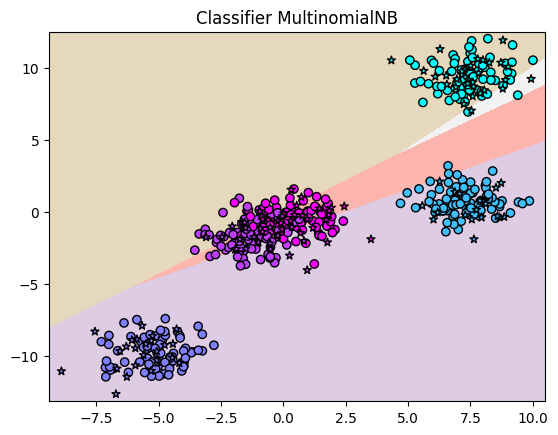

In [13]:
z = mnb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)

# 将训练集和测试集用散点图表示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.cool, edgecolor='k')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolor='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Classifier MultinomialNB')

plt.show()

【结果分析】从图中可以看出多项式朴素贝叶斯的还要差一些，

大部分数据点都被放到了错误的分类中。

这是因为，多项式朴素贝叶斯只适合用来对非负离散数值特征进行分类，

典型的例子就是对转化向量后的文本数据进行分类。

## 朴素贝叶斯实战 -- 判断肿瘤是良性还是恶性

### 对数据集进行分析

威斯康星乳腺肿瘤数据集是一个非常经典的用于病情分析的数据集，

它包括569个病例的数据样本，每个样本具有 30 个特征值，

而样本共分为两类：分别是恶性（Malignant）和良性 （Benign）

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


【结果分析】从这个结果中可以看到，数据集包含的信息有

特征数据 data、

分类值 target、

分类名称 target_names、

数据描述 DESCR、

以及特征名称 feature_names

In [15]:
print('肿瘤的分类：',cancer['target_names'])
print('\n肿瘤的特征：\n',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


【结果分析】就是我们所说，该数据集中肿瘤的分类包括恶性（Malignant）和良性（Benign），

而特征值就多了很多，如半径、表面纹理的灰度值、周长直、表面积值、平滑值等。

当然这些都涉及了一定的医学知识，我们那就不逐一展开了。

### 使用高斯朴素贝叶斯算法进行建模

用我们的直觉来分析的话，这个数据集的特征值并不属于二项式分布，

也不属于多项式分布，

所以我们选择使用高斯朴素贝叶斯（GaussianNB），

不过首先，我们将数据集拆分为训练集和测试集

In [16]:
# 将数据集的数值和分类目标赋值给 X 和 y
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

print('训练集数据形态：', X_train.shape)
print('测试集数据形态：', X_test.shape)

训练集数据形态： (426, 30)
测试集数据形态： (143, 30)


【结果分析】从结果中我们可以看到，通过使用 train_test_split 工具进行拆分，

现在的训练集中有 426 个样本， 而测试集中有 143 个样本，

当然特征值都是 30 个。

下面我们开始用高斯朴素贝叶斯对训练数据集进行拟合。

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('训练集得分：{:.3f}'.format(gnb.score(X_train, y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test, y_test)))

训练集得分：0.948
测试集得分：0.944


【结果分析】从结果中可以看到，GaussianNB 在训练集和测试集的得分都非常不错，均在 95% 左右

下面我们随便用其中一个样本 （如第 312 个样本）让模型进行一下预测，

看是否可以分到正确的分类中，输入代码如下：

In [18]:
print('模型预测的分类是：{}'.format(gnb.predict([X[312]])))
print('样本的正确分类是：', y[312])

模型预测的分类是：[1]
样本的正确分类是： 1


【结果分析】 从结果中我们看到，模型对第 312 个样本所进行的分类和正确的分类完全一致，

都是分类 1，也就是说，这个样本的肿瘤是一个良性的肿瘤。

### 高斯朴素贝叶斯的学习曲线

在机器学习中， 有一个概念称为学习曲线（learning curve）,

指的是随着数据集样本数量的增加，模型的得分变化情况。

下面我们一起来绘制一下高斯朴素贝叶斯在威斯康星乳腺肿瘤数据集中的学习曲线。

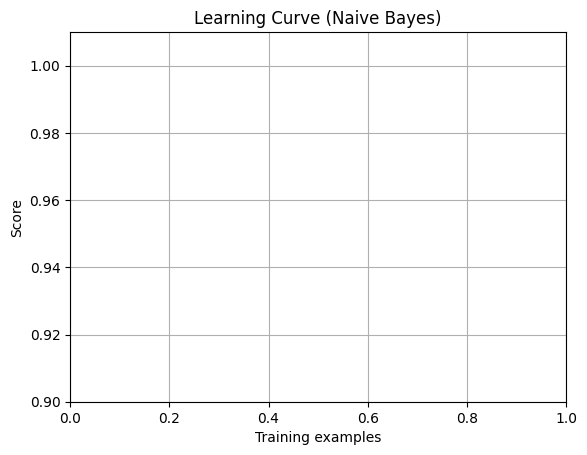

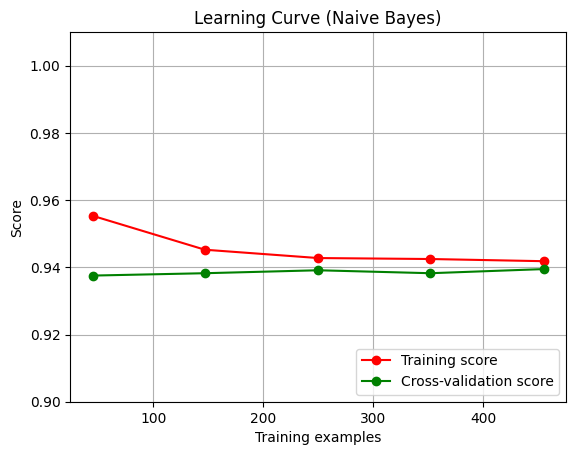

In [20]:
# 导入学习曲线库
from sklearn.model_selection import learning_curve
# 导入随机拆分工具
from sklearn.model_selection import ShuffleSplit

# 定义一个函数绘制学习曲线
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, 
    n_jobs=1, trains_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    # 设定横轴标签
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=trains_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label= 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label= 'Cross-validation score')

    plt.legend(loc="lower right")
    return plt

# 设定图题
title = "Learning Curve (Naive Bayes)"
# 设定拆分数量
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
# 设定模型为高斯朴素贝叶斯
estimator = GaussianNB()
# 调用我们定义好的函数
plot_learning_curve(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)

plt.show()

【结果分析】从图中可以看到，在训练数据集中， 随着样本量的增加，模型的得分是逐渐降低的。

这是因为随着样本数量增加， 模型要拟合的数据越来越多，难度也越来越大。

而模型要拟合的数据越来越多，难度也越来越大。

模型的交叉验证得分的变化相对没有那么明显，

从 10 个样本左右一直到接近 500 个样本为止，分数一直在 0.94 左右浮动。

这说明高斯朴素贝叶斯在预测方面，对于样本数量的要求没有那么苛刻。

如果你的样本数量比较少的话，应该可以考虑使用朴素贝叶斯算法进行建模。

## 小结

在本章中， 我们一起学习了朴素贝叶斯算法和它的几种变体--贝努利朴素贝叶斯、高斯朴素贝叶斯、和多项式朴素贝叶斯。

贝努利朴素贝叶斯适合与二项分布的数据集，

而多项式朴素贝叶斯适合计数类型的数据集，即非负、离散数据多数据集，

而高斯朴素贝叶斯适用的面就要广得多，它可以应用于任何连续数值型的数据集的话，高斯朴素贝叶斯模型的得分会更高。

相比起线性模型算法来说，朴素贝叶斯算法的效率会要高一些，

因为朴素贝叶斯算法会把数据集中的各个特征看作完全独立的，而不考虑特征之间的关联关系。

但同时模型泛化的能力会稍微弱一点， 不过一般情况下并不太影响实际的使用。

尤其是现在大数据的时代，很多数据集的样本特征可能就是成千上万，

这种情况下，模型的效率要比模型泛化性能多零点几个百分点的得分重要得多。

训练一个线性模型的时间可能会非常长，因此在这种情况下，朴素贝叶斯法往往是一个更好的选择。

在下一章中，我们会一起学习决策树和随机森林算法，

它们也是目前非常流行的算法之一，接下来我们马上开启新的旅程